<a href="https://colab.research.google.com/github/blackipod/hello-world/blob/main/INV6001_Assignment_2_3_Resampling_Part_1_LIMFRANCES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [ ]:
#Load the data
before_opt=np.array([23,21,19,24,35,17,18,24,33,27,21,23])
after_opt=np.array([31,28,19,24,32,27,16,41,23,32,29,33])

In [ ]:
before_opt.mean()

23.75

In [ ]:
after_opt.mean()

27.916666666666668

In [ ]:
observed_difference = after_opt.mean()-before_opt.mean()

In [ ]:
print("Difference between before and after optimization is:", observed_difference)

#But is this a valid measure?

Difference between before and after optimization is: 4.166666666666668


In [ ]:
# before_opt would have "Label 0"
# after_opt would have "Label 1"

In [ ]:
shoe_sales = np.array([np.append(np.zeros(before_opt.shape[0]), np.ones(after_opt.shape[0])), np.append(before_opt, after_opt)], dtype=int)

In [ ]:
print("Shape:", shoe_sales.shape)
print("Data:", "\n", shoe_sales)

Shape: (2, 24)
Data: 
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1]
 [23 21 19 24 35 17 18 24 33 27 21 23 31 28 19 24 32 27 16 41 23 32 29 33]]


In [ ]:
shoe_sales = shoe_sales.T
print("Shape:", shoe_sales.shape)
print("Data:", "\n", shoe_sales)

Shape: (24, 2)
Data: 
 [[ 0 23]
 [ 0 21]
 [ 0 19]
 [ 0 24]
 [ 0 35]
 [ 0 17]
 [ 0 18]
 [ 0 24]
 [ 0 33]
 [ 0 27]
 [ 0 21]
 [ 0 23]
 [ 1 31]
 [ 1 28]
 [ 1 19]
 [ 1 24]
 [ 1 32]
 [ 1 27]
 [ 1 16]
 [ 1 41]
 [ 1 23]
 [ 1 32]
 [ 1 29]
 [ 1 33]]


In [ ]:
np.random.shuffle(shoe_sales)

shoe_sales

array([[ 0, 35],
       [ 0, 17],
       [ 1, 19],
       [ 1, 24],
       [ 1, 41],
       [ 0, 24],
       [ 0, 27],
       [ 1, 32],
       [ 0, 21],
       [ 1, 31],
       [ 1, 27],
       [ 1, 33],
       [ 1, 16],
       [ 1, 23],
       [ 1, 28],
       [ 1, 32],
       [ 0, 23],
       [ 0, 24],
       [ 0, 33],
       [ 0, 23],
       [ 0, 18],
       [ 0, 21],
       [ 1, 29],
       [ 0, 19]])

In [ ]:
experiment_label = np.random.randint(0,2, shoe_sales.shape[0])
experiment_label

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0])

In [ ]:
experiment_data = np.array([experiment_label, shoe_sales[:,1]])
experiment_data = experiment_data.T
print(experiment_data)

[[ 0 35]
 [ 1 17]
 [ 1 19]
 [ 1 24]
 [ 1 41]
 [ 0 24]
 [ 0 27]
 [ 1 32]
 [ 0 21]
 [ 1 31]
 [ 1 27]
 [ 0 33]
 [ 1 16]
 [ 1 23]
 [ 0 28]
 [ 1 32]
 [ 0 23]
 [ 1 24]
 [ 0 33]
 [ 1 23]
 [ 0 18]
 [ 0 21]
 [ 0 29]
 [ 0 19]]


In [ ]:
experiment_diff_mean = experiment_data[experiment_data[:,0]==1].mean() - experiment_data[experiment_data[:,0]==0].mean()

In [ ]:
experiment_diff_mean

0.4166666666666661

In [ ]:
def shuffle_experiment(n_times):
  experiment_diff_mean = np.empty([n_times,1])
  for times in np.arange(n_times):
    experiment_label = np.random.randint(0,2,shoe_sales.shape[0])
    experiment_data = np.array([experiment_label, shoe_sales[:,1]]).T
    experiment_diff_mean[times] = experiment_data[experiment_data[:,0]==1].mean() - experiment_data[experiment_data[:,0]==0].mean()
  return experiment_diff_mean

In [ ]:
experiment_diff_mean = shuffle_experiment(100)
experiment_diff_mean[:10]


array([[ 2.08041958],
       [-0.34444444],
       [ 0.45555556],
       [-0.04285714],
       [ 1.38571429],
       [ 0.18888889],
       [ 1.57692308],
       [ 1.96666667],
       [ 1.6048951 ],
       [-0.07777778]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


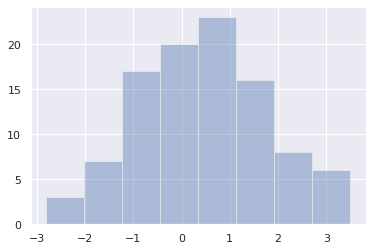

In [ ]:
sns.distplot(experiment_diff_mean, kde=False)

In [ ]:
print("Data: Difference in mean greater than observed:", experiment_diff_mean[experiment_diff_mean>=observed_difference])

print("Number of times diff in mean greater than observed:", experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0])

print("% of times diff in mean greater than observed:", experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0]/float(experiment_diff_mean.shape[0])*100)

Data: Difference in mean greater than observed: []
Number of times diff in mean greater than observed: 0
% of times diff in mean greater than observed: 0.0


#Second dataset

In [ ]:
before_opt_two = np.array([230, 210, 190, 240, 350, 170, 180, 240, 330, 270, 210, 230])
after_opt_two = np.array([310,180,190,240,220,240,160,410, 130, 320, 290, 210])

In [ ]:
print("Mean sales before price optimization", np.mean(before_opt_two))
print("Mean sales after price optimization", np.mean(after_opt_two))
print("Difference between before and after optimization", np.mean(after_opt_two)-np.mean(before_opt_two))

Mean sales before price optimization 237.5
Mean sales after price optimization 241.66666666666666
Difference between before and after optimization 4.166666666666657


In [ ]:
shoe_sales_two = np.array([np.append(np.zeros(before_opt_two.shape[0]), np.ones(after_opt_two.shape[0])), np.append(before_opt_two, after_opt_two)], dtype=int)
shoe_sales_two = shoe_sales_two.T

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


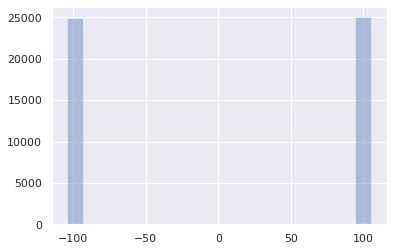

In [ ]:
experiment_diff_mean = shuffle_experiment(100000)
sns.distplot(experiment_diff_mean, kde=False)